In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


In [7]:
def f(x):  # A true underlying function
    return x * np.sin(x) 

x = np.linspace(0, 10, 10).reshape(-1, 1)  
y = f(x) + np.random.normal(0, 0.2, 10).reshape(-1, 1)  # Add noise


In [8]:
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))  # RBF kernel
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.01)


In [9]:
gp.fit(x, y)  # Fit the model using MLE
y_pred_mle, std_mle = gp.predict(x, return_std=True)


In [20]:
def laplace_approx(gp, x):
    # Mode (MAP estimate)
    y_map = gp.predict(x) 

    # Hessian (for approximating the covariance)
    _, grad = gp.predict(x, return_cov=True)
    grad = np.atleast_2d(grad)  
    hessian = -(grad.T @ grad) / len(x)  

    covariance = np.linalg.inv(hessian + 1e-7 * np.eye(hessian.shape[0]))
    return y_map, covariance

y_pred_laplace, cov_laplace = laplace_approx(gp, x)
std_laplace = np.sqrt(np.diag(cov_laplace))


/var/folders/34/0177579s72zfk8k1ytk34_9c0346k7/T/ipykernel_25637/46733108.py:14: RuntimeWarning: invalid value encountered in sqrt
  std_laplace = np.sqrt(np.diag(cov_laplace))


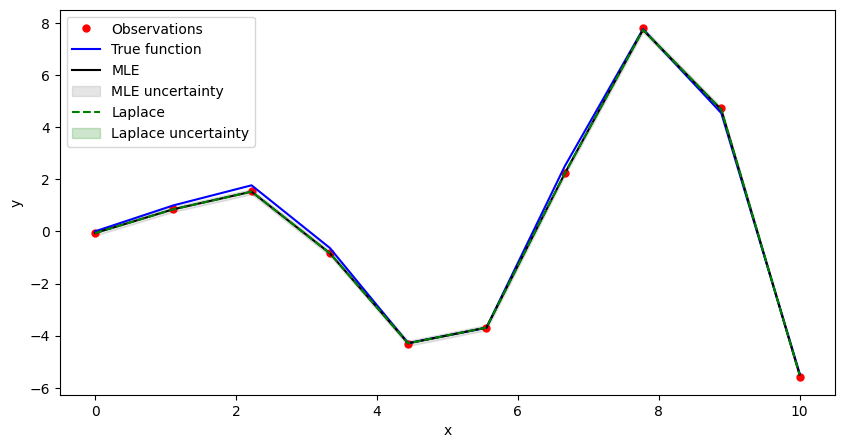

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r.', markersize=10, label='Observations')
plt.plot(x, f(x), 'b-', label='True function')
plt.plot(x, y_pred_mle, 'k-', label='MLE')
plt.fill_between(x[:,0], y_pred_mle - std_mle, y_pred_mle + std_mle, 
                 color='gray', alpha=0.2, label='MLE uncertainty')
plt.plot(x, y_pred_laplace, 'g--', label='Laplace')
plt.fill_between(x[:, 0], y_pred_laplace - 2 * std_laplace, y_pred_laplace + 2 * std_laplace,
                 color='green', alpha=0.2, label='Laplace uncertainty')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [17]:
cov_laplace

array([[-1.02309095e+05,  8.88113431e+02, -3.06813001e+02,
         1.04771622e+02, -3.57292160e+01,  1.21817022e+01,
        -4.15233895e+00,  1.41336330e+00, -4.75321617e-01,
         1.43246499e-01],
       [ 8.88113431e+02, -1.02650811e+05,  1.00615907e+03,
        -3.47121695e+02,  1.18516829e+02, -4.04146971e+01,
         1.37767993e+01, -4.68950967e+00,  1.57716712e+00,
        -4.75321617e-01],
       [-3.06813001e+02,  1.00615907e+03, -1.02691587e+05,
         1.02008203e+03, -3.51868486e+02,  1.20132857e+02,
        -4.09590022e+01,  1.39430003e+01, -4.68950967e+00,
         1.41336330e+00],
       [ 1.04771622e+02, -3.47121695e+02,  1.02008203e+03,
        -1.02696340e+05,  1.02170041e+03, -3.52413603e+02,
         1.20299331e+02, -4.09590022e+01,  1.37767993e+01,
        -4.15233895e+00],
       [-3.57292160e+01,  1.18516829e+02, -3.51868486e+02,
         1.02170041e+03, -1.02696886e+05,  1.02186691e+03,
        -3.52413603e+02,  1.20132857e+02, -4.04146971e+01,
         1.